## Analisis temporal

In [5]:
import pandas as pd
import numpy as np

* **Conversión de fechas**: Pandas permite convertir cadenas de texto a objetos de tiempo con facilidad.

* **Resampling**: Cambiar la frecuencia de tus datos de tiempo.

In [11]:
# Conversión de fechas
df = pd.DataFrame({'date': pd.date_range(start = '2023-01-01',periods=365), 'value':np.random.randint(10,20,365)})
df['date'] = pd.to_datetime(df['date'])
df

,date,value
0,2023-01-01,13
1,2023-01-02,12
2,2023-01-03,16
3,2023-01-04,19
4,2023-01-05,18
...,...,...
360,2023-12-27,17
361,2023-12-28,15
362,2023-12-29,18
363,2023-12-30,16


<Axes: xlabel='date'>

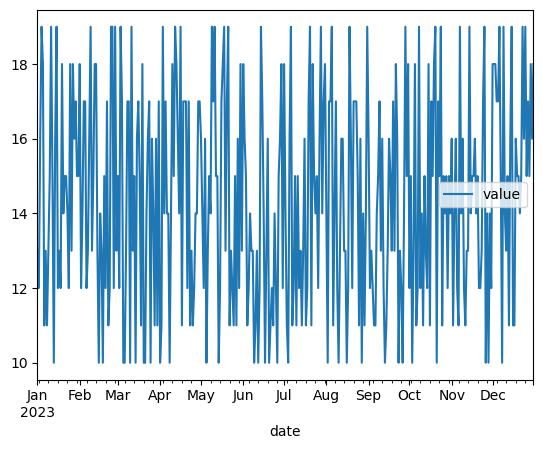

In [18]:
df.plot(y = "value", x = "date")

In [19]:
# Resampling
df_dateindx = df.set_index('date')
df_dateindx

,value
date,
2023-01-01,13
2023-01-02,12
2023-01-03,16
2023-01-04,19
2023-01-05,18
...,...
2023-12-27,17
2023-12-28,15
2023-12-29,18


<Axes: xlabel='date'>

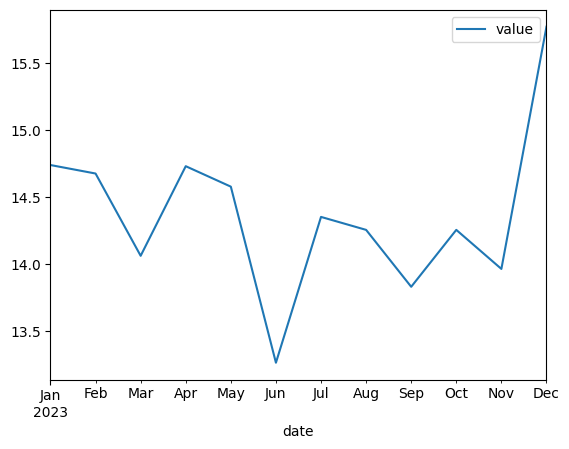

In [24]:
df_resampled = df_dateindx.resample('M').mean()  # Suma mensual
df_resampled.plot()


## Operaciones con texto

* Split: Dividir una columna de texto en varias columnas.

* Replace: Reemplazar texto en una columna.

In [25]:
# Split
df2 = pd.DataFrame({'name': ['John Smith', 'Jane Doe']})
df2[['first_name', 'last_name']] = df2['name'].str.split(' ', expand=True)
df2


,name,first_name,last_name
0,John Smith,John,Smith
1,Jane Doe,Jane,Doe


In [26]:
# Replace
df2['first_name'] = df2['first_name'].str.replace('John', 'Jon')
df2

,name,first_name,last_name
0,John Smith,Jon,Smith
1,Jane Doe,Jane,Doe


## Fusión y Combinación


* Merge: Combinar dos DataFrames basados en una columna en común.

* Concat: Concatenar dos DataFrames vertical u horizontalmente.

* Join: Realizar joins tipo SQL en DataFrames.

In [27]:
# Merge
df1 = pd.DataFrame({'key': ['A', 'B'], 'value1': [1, 2]})
df2 = pd.DataFrame({'key': ['A', 'B'], 'value2': [3, 4]})
merged_df = pd.merge(df1, df2, on='key')

merged_df


,key,value1,value2
0,A,1,3
1,B,2,4


In [28]:
# Concat
concat_df = pd.concat([df1, df2], axis=0)
concat_df

,key,value1,value2
0,A,1.0,NaN
1,B,2.0,NaN
0,A,NaN,3.0
1,B,NaN,4.0


## Manipulación de Índices


* Set Index: Establecer una columna como índice.

* Reset Index: Restablecer el índice del DataFrame.

* Multi-Index: Usar múltiples niveles de índice.

In [29]:
# Set Index
df1.set_index('key', inplace=True)
df1

,value1
key,
A,1
B,2


In [30]:
# Reset Index
df.reset_index(inplace=False)
df

,date,value
0,2023-01-01,13
1,2023-01-02,12
2,2023-01-03,16
3,2023-01-04,19
4,2023-01-05,18
...,...,...
360,2023-12-27,17
361,2023-12-28,15
362,2023-12-29,18
363,2023-12-30,16


## Transformación de Datos


* Map y Apply: Aplicar funciones a elementos o columnas del DataFrame.

* Pivot Tables: Crear tablas dinámicas.

In [32]:
# Map y Apply
df['value1_squared'] = df['value'].map(lambda x: x ** 2)
df['value1_doubled'] = df['value'].apply(lambda x: x * 2)

df["eval"]=df['value'].map(lambda x: "A" if x >=15 else "B" )
df

,date,value,value1_squared,value1_doubled,eval
0,2023-01-01,13,169,26,B
1,2023-01-02,12,144,24,B
2,2023-01-03,16,256,32,A
3,2023-01-04,19,361,38,A
4,2023-01-05,18,324,36,A
...,...,...,...,...,...
360,2023-12-27,17,289,34,A
361,2023-12-28,15,225,30,A
362,2023-12-29,18,324,36,A
363,2023-12-30,16,256,32,A


In [33]:
df.pivot(values="value", columns="eval")

eval,A,B
0,NaN,13.0
1,NaN,12.0
2,16.0,NaN
3,19.0,NaN
4,18.0,NaN
...,...,...
360,17.0,NaN
361,15.0,NaN
362,18.0,NaN
363,16.0,NaN


## Visualización


Pandas tiene integración con Matplotlib, permitiéndote visualizar tus DataFrames con facilidad.

<Axes: xlabel='eval'>

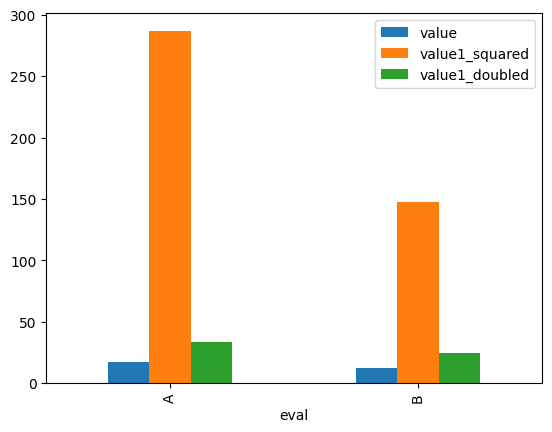

In [35]:
# Usando Pandas para visualizar
df.set_index("date", inplace=True)
df.groupby("eval").mean().plot(kind='bar')


## Estadísticas Avanzadas


Correlación: Encontrar la correlación entre las columnas.

Covarianza: Calcular la covarianza entre las columnas.

In [38]:
# Correlación
correlation = df.corr(numeric_only=True)
correlation



,value,value1_squared,value1_doubled
value,1.0000,0.9961,1.0000
value1_squared,0.9961,1.0000,0.9961
value1_doubled,1.0000,0.9961,1.0000


In [41]:
# Covarianza
covariance = df.cov(numeric_only=True)
covariance

,value,value1_squared,value1_doubled
value,7.790727,225.970300,15.581454
value1_squared,225.970300,6605.695740,451.940599
value1_doubled,15.581454,451.940599,31.162908
